In [1]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from ipywidgets import interactive

In [2]:
%matplotlib widget
plt.ion()

interactive(children=(FloatSlider(value=1.0, description='intensity', max=10.0, step=0.01), FloatSlider(value=…

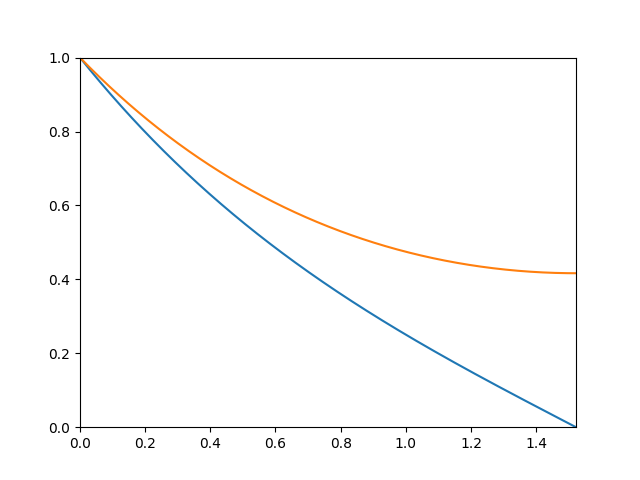

In [3]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

t_resolution = 1000
t = np.linspace(0, 1, t_resolution)
(plot1,) = ax.plot(t, np.zeros_like(t))
(plot2,) = ax.plot(t, np.zeros_like(t))


def draw(
    intensity=1.0,
    advantage=1.1,
):
    if advantage == 1:
        return

    duration = np.log((advantage + 1) / abs(advantage - 1)) / (2 * intensity)

    t = np.linspace(0, duration, t_resolution)
    ti = t * intensity

    x = np.cosh(ti) - np.sinh(ti) * advantage
    y = np.cosh(ti) - np.sinh(ti) / advantage

    plot1.set_xdata(t)
    plot1.set_ydata(x)

    plot2.set_xdata(t)
    plot2.set_ydata(y)

    ax.set_xlim(t.min(), t.max())
    ax.set_ylim(min(x.min(), y.min()), max(x.max(), y.max()))


bounds_reinforcements = (0, 10, 0.1)
bounds_size = (0, 10, 0.1)
bounds_effectiveness = (0, 1, 0.01)

widget = interactive(
    draw,
    intensity=(0, 10, 0.01),
    advantage=(0, 2, 0.01),
)
display(widget)

interactive(children=(FloatSlider(value=1.0, description='x0', max=10.0), FloatSlider(value=2.0, description='…

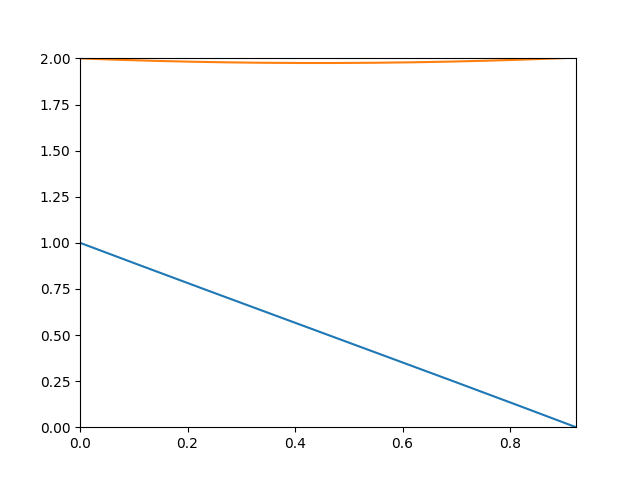

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

t_resolution = 1000
t = np.linspace(0, 10, t_resolution)
(plot1,) = ax.plot(t, np.zeros_like(t))
(plot2,) = ax.plot(t, np.zeros_like(t))


def draw(
    x0=1,
    y0=2,
    a=0.9,
    b=1.1,
    c=0.123,
    d=0.2364,
):
    omega = np.sqrt(b * d)
    mu = np.sqrt(b / d)

    xe = c / d
    ye = a / b
    u0 = x0 - xe
    v0 = y0 - ye

    s = u0 - mu * v0
    if s == 0:
        duration = 10
    elif s > 0:
        duration = np.log((ye + np.sqrt(ye**2 + (u0 / mu) ** 2 - v0**2)) / (u0 / mu - v0)) / omega
    else:
        duration = np.log((xe + np.sqrt(xe**2 - u0**2 + (mu * v0) ** 2)) / (v0 * mu - u0)) / omega

    t = np.linspace(0, duration, t_resolution)
    ot = omega * t

    x = xe + u0 * np.cosh(ot) - v0 * np.sinh(ot) * mu
    y = ye + v0 * np.cosh(ot) - u0 * np.sinh(ot) / mu

    plot1.set_xdata(t)
    plot1.set_ydata(x)

    plot2.set_xdata(t)
    plot2.set_ydata(y)

    ax.set_xlim(t.min(), t.max())
    ax.set_ylim(min(x.min(), y.min()), max(x.max(), y.max()))


bounds_size = (0, 10, 0.1)
bounds_reinforcements = (0, 2, 0.1)
bounds_effectiveness = (0, 1, 0.01)

widget = interactive(
    draw,
    x0=bounds_size,
    y0=bounds_size,
    a=bounds_reinforcements,
    b=bounds_effectiveness,
    c=bounds_reinforcements,
    d=bounds_effectiveness,
)
display(widget)